# Multimedia Services and Applications - Image Processing in Python

## Objectives
This practical assignment intends to apply and consolidate the knowledge gained concerning image processing techniques to process and improve images.

## Introduction
The objective of this laboratory assignment is to allow the student to experiment further digital processing techniques of visual signals, using Python and the OpenCV library.

To conduct the proposed experiments, we will use Python scripts and images available on the course platform. Images will be used as input data to those scripts. The output will consist of processed versions of those images, which should be analyzed by the student to interpret the effects of the conducted processing operations. The majority of those images has the bitmap format (.bmp) which means that each pixel is represented by three RGB eight-bit values, so in total 24 bits per pixel.

Note: the symbol ✍ means that you should include in your report graphics or images resulting from the operated processing or code that you may have developed. The symbol 🕵 indicates that you should include in your report a brief analysis of the results you have obtained.

## Resources
1. We will use the OpenCV library for the image processing tasks. To install the OpenCV library, you can use the following bash command (inside the SAM conda environment):

```
pip install opencv-python
```


In [5]:
%matplotlib inline 
# Boilerplate code
import os
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# The following line has to output SAM, otherwise it means that the right
# conda environment is not being activated
print (os.environ['CONDA_DEFAULT_ENV']) 

SAM


2. You may depart from the following code example `segment_SAM_example`

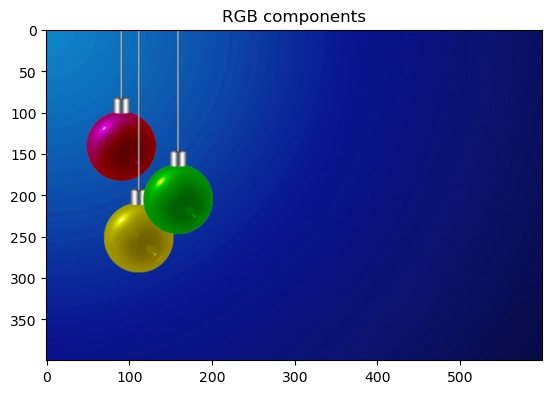

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_name = "christmasBB"

# Read input image
image = cv2.imread(f'./images/{image_name}.jpg')

# Check if the image has three channels (RGB)
if len(image.shape) == 3:
    height, width, planes = image.shape
    b, g, r = cv2.split(image)
# else You need a RGB image
# Show RGB components
plt.imshow(cv2.merge((r, g, b)))
plt.title('RGB components');

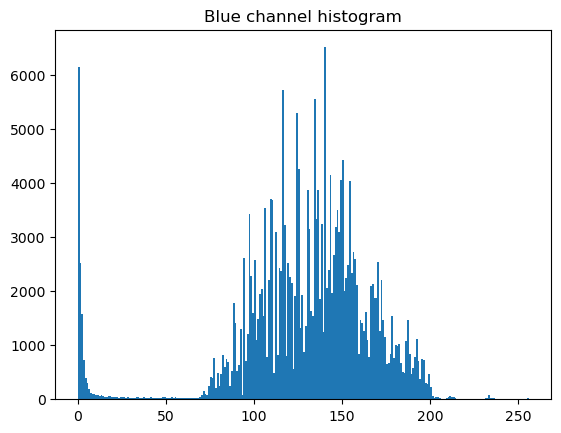

In [7]:
# Show Blue channel histogram
plt.hist(b.ravel(), 256, [0, 256])
plt.title('Blue channel histogram');


By analysing this histogram, you pick a specific value for the threshold. (Try with different values)

In [8]:
threshold = 50

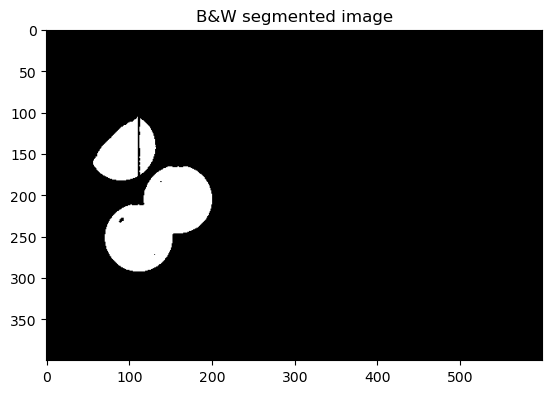

In [9]:
# BW segmentation
BWforeground = np.where(b < threshold, 255, 0)
plt.imshow(BWforeground, cmap='gray')
plt.title('B&W segmented image');

Now, to show the full-color representation of the foreground objects we do the following operations: a) applying a binary mask to an image and b) converting the color space of the resulting image for display.

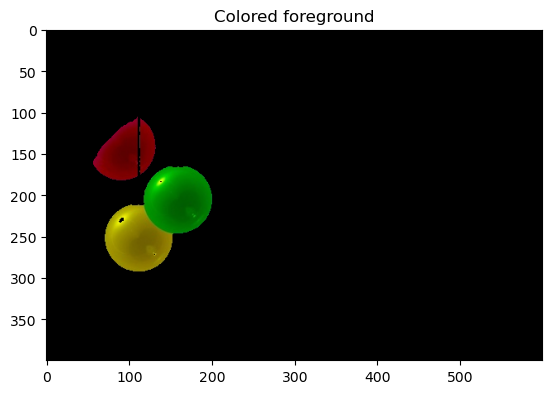

In [10]:
# Applying a binary mask
# The mask is applied by converting BWforeground to an 8-bit unsigned integer (np.uint8), as OpenCV expects masks to be of this data type.
foreground = cv2.bitwise_and(image, image, mask=BWforeground.astype(np.uint8))
# Display Image
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Colored foreground');

Now let's see an alternative example, based on the _blueness_ value.

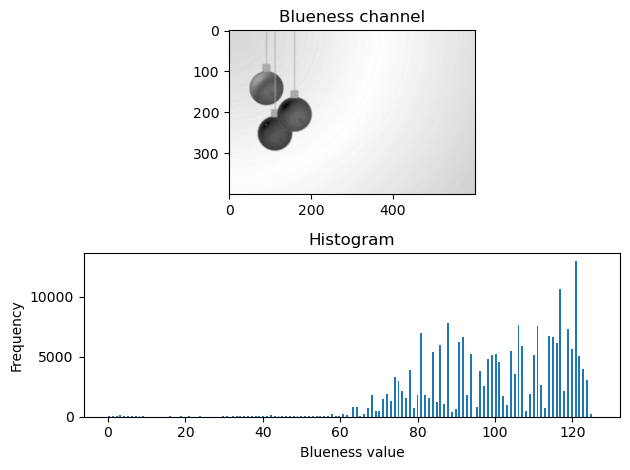

In [11]:
# Alternative using the blueness factor

# This line computes the blueness factor for each pixel in the image by subtracting 
# the maximum value of the red and green channels from the blue channel value.
blueness = b.astype(np.float64) - np.maximum(r.astype(np.float64), g.astype(np.float64))

fig, axs = plt.subplots(2,1)
# Visualize the blueness image
axs[0].imshow(blueness, cmap='gray')
axs[0].set_title('Blueness channel')

# Plot the histogram of the blueness channel
axs[1].hist(blueness.ravel(), 256, [0, np.max(blueness)])
axs[1].set_title('Histogram')
axs[1].set_xlabel('Blueness value')
axs[1].set_ylabel('Frequency');
plt.tight_layout()  # Adjust spacing between subplots


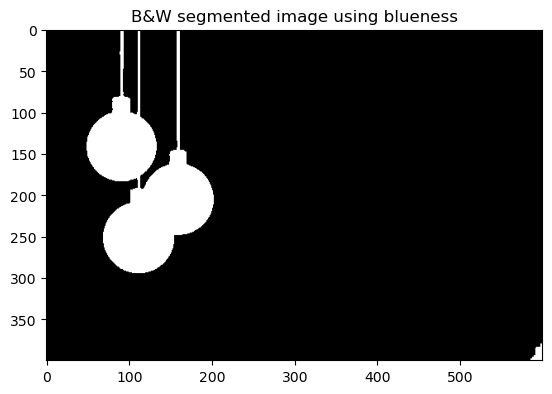

In [12]:
threshold = 60
BWforegroundBlueness = blueness < threshold
plt.imshow(BWforegroundBlueness, cmap='gray')
plt.title('B&W segmented image using blueness');


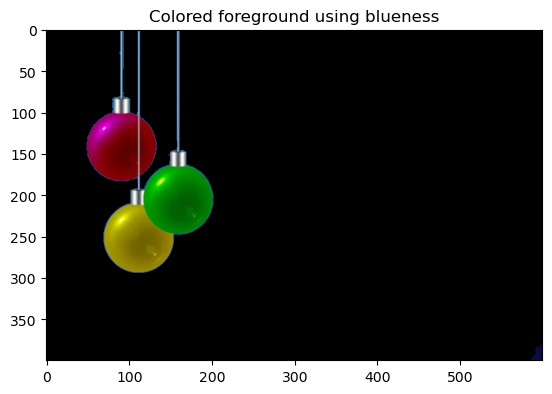

In [13]:
# Obtain the full-color representation of the foreground objects
foreground_bl = cv2.bitwise_and(image, image, mask=BWforegroundBlueness.astype(np.uint8))
plt.imshow(cv2.cvtColor(foreground_bl, cv2.COLOR_BGR2RGB))
plt.title('Colored foreground using blueness');

True

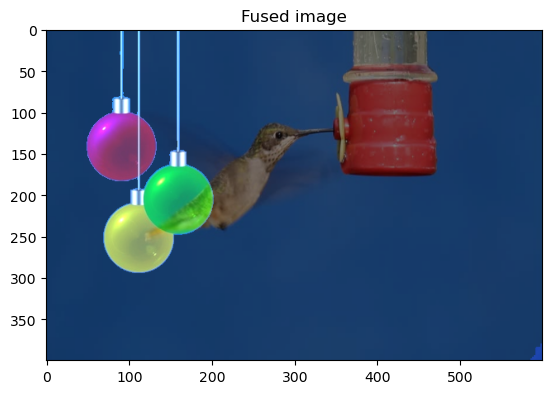

In [16]:

# Creating a new image by superimposing the segmented objects
new_background_name = 'birdBB'
output_image_path=f'./images/segmented_over_{new_background_name}.jpg'
# Read input image
new_background = cv2.imread(f'./images/{new_background_name}.jpg')
# Resize new_background to match the size of foreground_bl
new_background_resized = cv2.resize(new_background, (foreground_bl.shape[1], foreground_bl.shape[0]))
# Perform the weighted addition
output_image = cv2.addWeighted(new_background_resized, 0.5, foreground_bl, 1, 0)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Fused image');
# Save the Image
cv2.imwrite(output_image_path, output_image)


## Work to be developed

On TV weather news, what the viewer normally sees is the weather forecast person standing in front of maps. In traditional news production, they just stand in front of a blue (or green) wall. Put in simple manner, a special system extracts the person (the “weatherman’”) from the images and adds her/ him in front of the real weather related images. The basic idea of this system is to split an image into RGB channels, create a mask based on the information of the blue channel, and use this mask to extract images. In this assignment, you will develop a script that is able to do just this.

### 1.1 Basic segmentation:

Based on the code `segment_SAM_example`, write a Python script (or jupyter-notebook) ✍ that:

* imports a coloured image with a blue background and presents that image on the screen;
* separates each RGB component in a different matrix and visualises each one on the screen;
* uses the matrix with the B component to identify the foreground objects (the jumping man or the Christmas bulbs or the bird). One possibility for doing this is to inspect the values of the B matrix: high values will correspond to the background. If we set up a threshold with a value just below those higher values, all the pixels that have a value lower than the threshold in principle will belong to the foreground (they will represent the foreground objects, i.e., the jumping man, the christmas bulbs or the bird). Using that threshold, copy from the B matrix to a new matrix (with the same dimensions) only the pixel values that are below that threshold. When doing that you may put those pixels with the value 255 and all the others with value 0 (you will create a black and white picture). To decide on the threshold, instead of looking directly at the values of the B matrix, you may generate the histogram with the built-in function `cv2.calcHist` (or other that you may prefer) and by inspecting visually the histogram decide on a suitable threshold value (the script may ask the user to input that value).
* shows the black and white segmented image on the screen and creates in the disk a new file with that image.
* Make experiments with different threshold values and with different images. Interpret the results and comment the results taking into consideration that you have used only the blue channel. 
* 🕵 **Could there be low blue value in zones of the background? Could there be high blue values in some parts of the foreground objects? Is it always true that a pixel with a high value in the B component is always blue?**


## 1.2 Alternative segmentation:

Based on the code `segment_SAM_example`, write a Python script (or jupyter-notebook) ✍ that:

* imports a coloured image with a blue background and presents that image on the screen;
* separates each RGB component in a different matrix and visualises each one on the screen;
* Considering that a pixel is really blue if it has high values in the B component and low values in the other components, computes the “blueness” of a pixel using the equation `blueness=B−max(R,G)`.
* selects a threshold based on the blueness factor (adopt the procedure explained above) and creates a new black and white image with the pixels of the foreground objects with value 255 and all the other with value zero (adopt the procedure explained above).
* shows the black and white segmented image on the screen and creates in the disk a new file with that image.
* 🕵 **Compare these results with the original ones. Which are the better, and why?** 


## 2. Adding objects to another image

In this part you will use the segmented images that have been generated by your previous scripts to create a new image with the superimposition of the segmented image with a new image.

* Use the OpenCV function `cv2.addWeighted()` to achieve that. The function blends the images by calculating a weighted sum of each pixel value, with the weight being determined by a scalar alpha value for each image. You may see the example above.
* Modify your previous script(s) to generate a coloured segmented image and not only a black and white version.
* 🕵 **Experiment with different images and comment on your results** 

## Deliverables:

- Deliver your code and a short report condensing your answers, images, and comments to your results.

### 1.1 Basic segmentation:

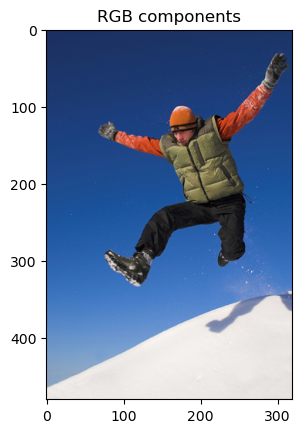

In [11]:
#image_name = "birdBB"
#image_name = "christmasBB"
image_name = "jump"

# Read input image
image = cv2.imread(f'./images/{image_name}.jpg')

# Check if the image has three channels (RGB)
if len(image.shape) == 3:
    height, width, planes = image.shape
    b, g, r = cv2.split(image)
# else You need a RGB image
# Show RGB components
plt.imshow(cv2.merge((r, g, b)))
plt.title('RGB components');

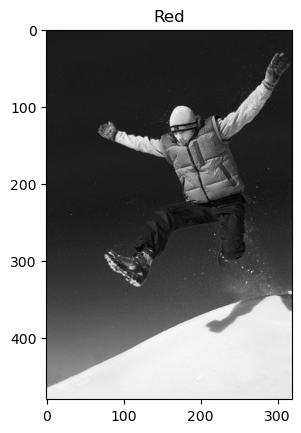

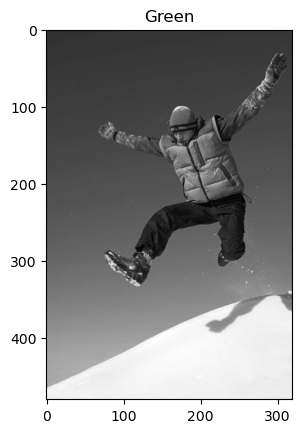

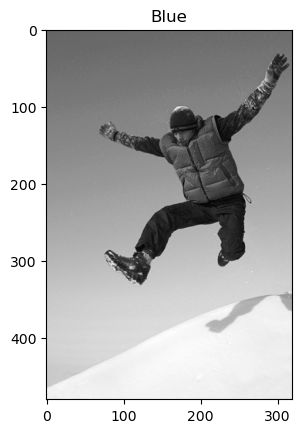

In [12]:
plt.title("Red")
plt.imshow(r, cmap="gray")
plt.show()

plt.title("Green")
plt.imshow(g, cmap="gray")
plt.show()

plt.title("Blue")
plt.imshow(b, cmap="gray")
plt.show()

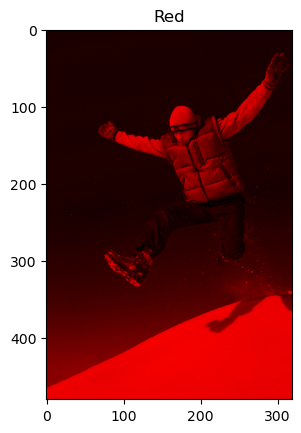

In [13]:
red = image.copy()
# set blue and green channels to 0
red[:, :, 0] = 0
red[:, :, 1] = 0
bb, gg, rr = cv2.split(red)

plt.title("Red")
plt.imshow(cv2.merge((rr, gg, bb)))
plt.show()


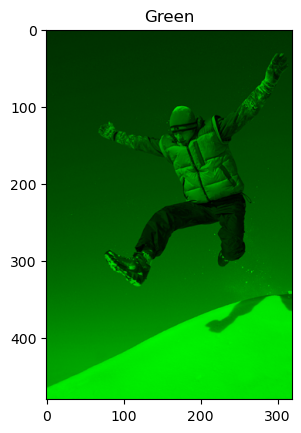

In [14]:

green = image.copy()
# set blue and red channels to 0
green[:, :, 0] = 0
green[:, :, 2] = 0
bb, gg, rr = cv2.split(green)

plt.title("Green")
plt.imshow(cv2.merge((rr, gg, bb)))
plt.show()


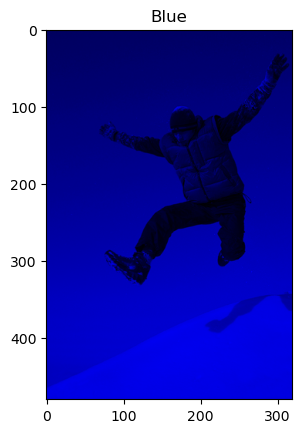

In [15]:

blue = image.copy()
# set green and red channels to 0
blue[:, :, 1] = 0
blue[:, :, 2] = 0

bb, gg, rr = cv2.split(blue)

plt.title("Blue")
plt.imshow(cv2.merge((rr, gg, bb)))
plt.show()

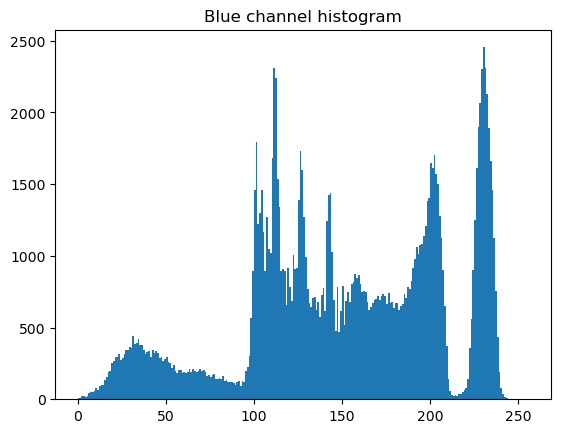

In [16]:
# Show Blue channel histogram
plt.hist(b.ravel(), 256, [0, 256])
plt.title('Blue channel histogram');

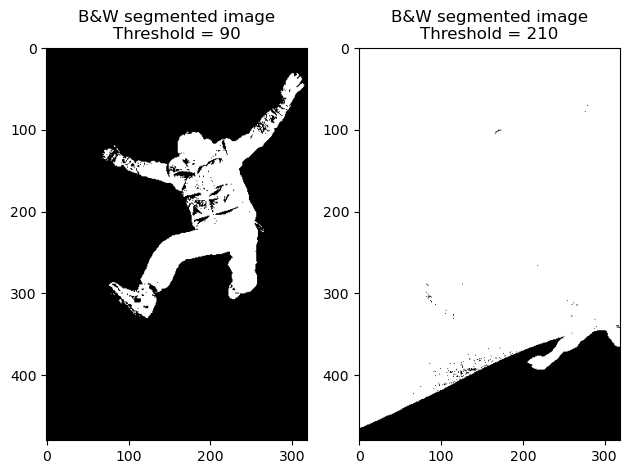

In [17]:
plt.subplot(1, 2, 1)
if(image_name == 'birdBB'):
    threshold = 150
elif(image_name == 'christmasBB'):
    threshold = 70
else:
    threshold = 90
# BW segmentation
BWforeground = np.where(b < threshold, 255, 0)
plt.imshow(BWforeground, cmap='gray')
plt.title('B&W segmented image\nThreshold = ' + str(threshold));

plt.subplot(1, 2, 2)
if(image_name == 'birdBB'):
    threshold = 200
elif(image_name == 'christmasBB'):
    threshold = 90
else:
    threshold = 210
# BW segmentation
BWforeground = np.where(b < threshold, 255, 0)
plt.imshow(BWforeground, cmap='gray')
plt.title('B&W segmented image\nThreshold = ' + str(threshold));

plt.tight_layout()

plt.show()


### 1.2 Alternative segmentation:

In [21]:
display_cv2 = False

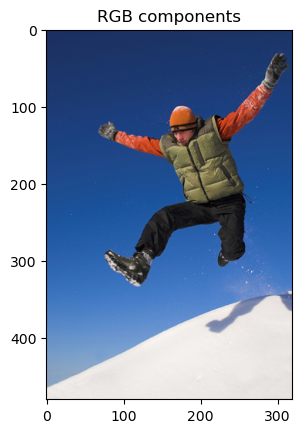

In [22]:
import cv2
import numpy as np

# load the image
image = cv2.imread('./images/jump.jpg')

if(display_cv2):    
    # display the original image
    cv2.imshow('Original Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    # Check if the image has three channels (RGB)
    if len(image.shape) == 3:
        height, width, planes = image.shape
        b, g, r = cv2.split(image)
    # else You need a RGB image
    # Show RGB components
    plt.imshow(cv2.merge((r, g, b)))
    plt.title('RGB components');

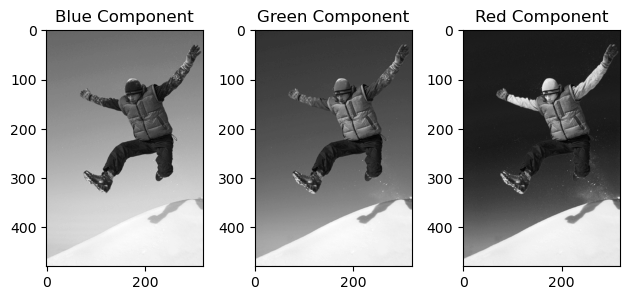

In [27]:
B, G, R = cv2.split(image)

if(display_cv2):
    cv2.imshow('Blue Component', B)
    cv2.imshow('Green Component', G)
    cv2.imshow('Red Component', R)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
else:
    plt.subplot(1, 3, 1)
    plt.title("Blue Component")
    plt.imshow(B, cmap="gray")

    plt.subplot(1, 3, 2)
    plt.title("Green Component")
    plt.imshow(G, cmap="gray")

    plt.subplot(1, 3, 3)
    plt.title("Red Component")
    plt.imshow(R, cmap="gray")

    plt.tight_layout()
    plt.show()
    

Here we separated each RGB component into a different matrix and we dislpayed each.

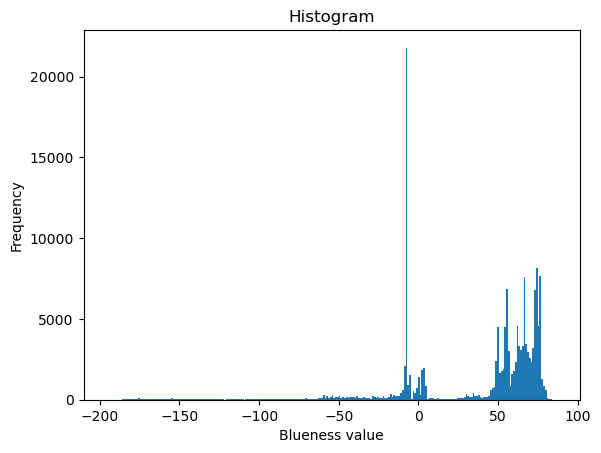

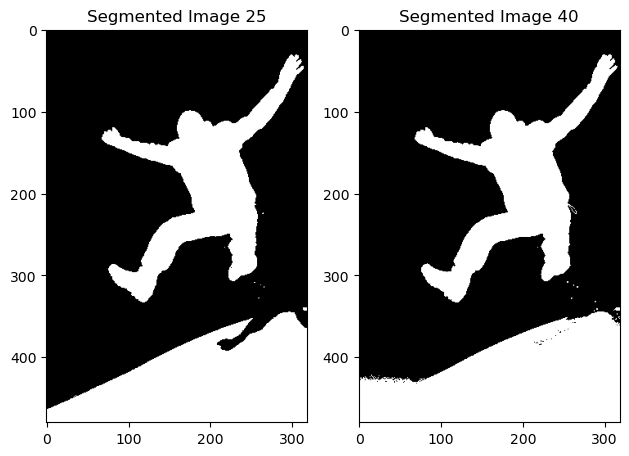

In [88]:
blueness = np.subtract(B.astype(np.float64), np.maximum(R.astype(np.float64),G.astype(np.float64)))

threshold = 25
threshold2 = 40

mask = np.zeros_like(B)
mask[blueness < threshold] = 255

mask2 = np.zeros_like(B)
mask2[blueness < threshold2] = 255

# Plot the histogram of the blueness channel
plt.hist(blueness.ravel(), 256, [np.min(blueness), np.max(blueness)])
plt.title('Histogram')
plt.xlabel('Blueness value')
plt.ylabel('Frequency');
plt.show()

if(display_cv2):
    cv2.imshow('Segmented Image', mask)
    cv2.imshow('Segmented Image2', mask2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    plt.subplot(1, 2, 1)
    plt.title("Segmented Image " + str(threshold))
    plt.imshow(mask, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Segmented Image " + str(threshold2))
    plt.imshow(mask2, cmap="gray")

    plt.tight_layout()
    plt.show()


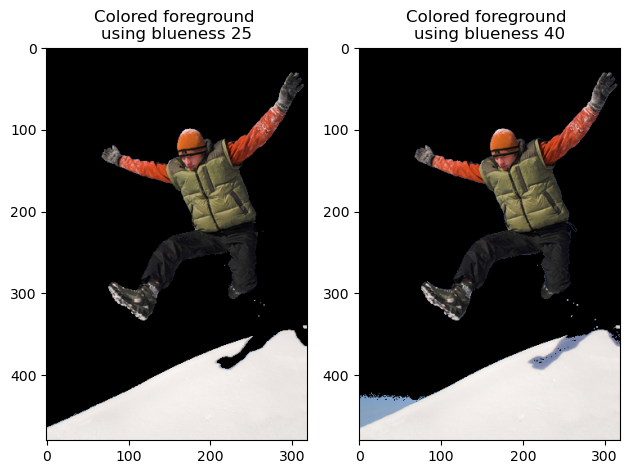

In [89]:

foreground_bl_1 = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))
foreground_bl_2 = cv2.bitwise_and(image, image, mask=mask2.astype(np.uint8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(foreground_bl_1, cv2.COLOR_BGR2RGB))
plt.title('Colored foreground \nusing blueness ' + str(threshold));

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(foreground_bl_2, cv2.COLOR_BGR2RGB))
plt.title('Colored foreground \nusing blueness ' + str(threshold2));

plt.tight_layout()
plt.show()

In [91]:
cv2.imwrite('segmented_image_' + str(threshold) + '.jpg', foreground_bl_1)
cv2.imwrite('segmented_image2_' + str(threshold2) + '.jpg', foreground_bl_2)

True